In [2]:
!Pip install seaborn

   -------------------------------------- 294.9/294.9 kB 145.8 kB/s eta 0:00:00


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import numpy as np
import cv2
import os

In [4]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 128
data = []

In [5]:
def get_training_data(data_dir):
    data = []
    labels_array = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_path = os.path.join(path, img)
                img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img_arr is None:
                    raise ValueError(f"Image not loaded properly: {img_path}")
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append(resized_arr.flatten())
                labels_array.append(class_num)
            except Exception as e:
                print(f"Error processing {img_path}: {e}")
    return np.array(data), np.array(labels_array)

In [6]:
train_features, train_labels = get_training_data(r"train")
test_features, test_labels = get_training_data(r"test")
val_features, val_labels = get_training_data(r"val")

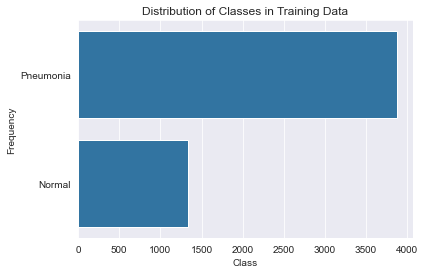

In [8]:
labels_mapped = ['Pneumonia' if label == 0 else 'Normal' for label in train_labels]
sns.set_style('darkgrid')
sns.countplot(labels_mapped)
plt.title("Distribution of Classes in Training Data")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

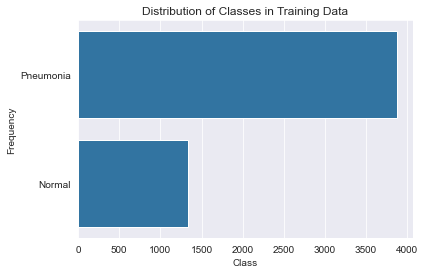

In [10]:
labels_mapped = ['Pneumonia' if label == 0 else 'Normal' for label in train_labels]
sns.set_style('darkgrid')
sns.countplot(labels_mapped)
plt.title("Distribution of Classes in Training Data")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [13]:
# Normalize the data
x_train = np.array(train_features) / 255
x_val = np.array(val_features) / 255
x_test = np.array(test_features) / 255

In [15]:
# resize data for deep learning
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(train_labels)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(val_labels)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(test_labels)

In [16]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [23]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (128,128,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer = "Adam" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

c:\Users\91638\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 951,489 (3.63 MB)

 Trainable params: 950,401 (3.63 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [12]:
#learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [18]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) )

Epoch 1/12


c:\Users\91638\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 64s 362ms/step - accuracy: 0.8457 - loss: 0.5097 - val_accuracy: 0.5000 - val_loss: 5.4318
Epoch 2/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 57s 348ms/step - accuracy: 0.9187 - loss: 0.2068 - val_accuracy: 0.5000 - val_loss: 6.0810
Epoch 3/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 57s 349ms/step - accuracy: 0.9306 - loss: 0.1747 - val_accuracy: 0.5000 - val_loss: 5.4439
Epoch 4/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 57s 348ms/step - accuracy: 0.9427 - loss: 0.1634 - val_accuracy: 0.4375 - val_loss: 0.6808
Epoch 5/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 58s 351ms/step - accuracy: 0.9436 - loss: 0.1584 - val_accuracy: 0.5625 - val_loss: 2.2304
Epoch 6/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 60s 369ms/step - accuracy: 0.9465 - loss: 0.1387 - val_accuracy: 0.8750 - val_loss: 0.3150
Epoch 7/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 56s 344ms/step - accuracy: 0.9530 - loss: 0.1319 - val_accuracy: 0.5000 - val_loss: 2.6385
Epoch 8/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 56s 344ms/step - accuracy: 0.9604 - loss: 0.1257 - val

In [25]:
!pip install imblearn

   --------------------------------------- 258.0/258.0 kB 22.3 kB/s eta 0:00:00


Epoch 1/20


c:\Users\91638\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


243/243 ━━━━━━━━━━━━━━━━━━━━ 87s 342ms/step - accuracy: 0.9600 - loss: 0.1518
Epoch 2/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 83s 341ms/step - accuracy: 0.9639 - loss: 0.1374
Epoch 3/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 84s 343ms/step - accuracy: 0.9586 - loss: 0.1444
Epoch 4/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 84s 345ms/step - accuracy: 0.9640 - loss: 0.1283
Epoch 5/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 84s 344ms/step - accuracy: 0.9680 - loss: 0.1196
Epoch 6/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 83s 342ms/step - accuracy: 0.9640 - loss: 0.1274
Epoch 7/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 86s 352ms/step - accuracy: 0.9646 - loss: 0.1444
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 5.
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step


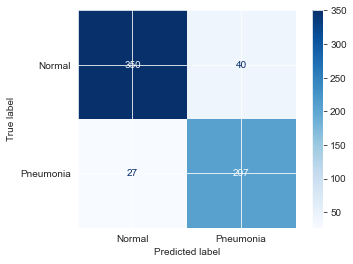

In [29]:
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have X_train, y_train, X_test, y_test
# Note: Ensure X_train and X_test are reshaped and normalized appropriately for your model

# Apply SMOTE to rebalance the dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(
    x_train.reshape(-1, x_train.shape[1] * x_train.shape[2] * x_train.shape[3]), y_train)
X_resampled = X_resampled.reshape(-1, x_train.shape[1], x_train.shape[2], x_train.shape[3])

# Compute class weights
# Adjust the weight for Pneumonia (class 1)
class_weight_dict = {0: 1.0, 1: 2.0}

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_resampled)

# Compile your model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='accuracy',  # monitor the accuracy
    patience=2,  # number of epochs with no improvement after which training will be stopped
    verbose=1,
    mode='max',  # mode should be 'max' for accuracy
    restore_best_weights=True  # restore the best weights observed during training
)

# Train your model with class weights, data augmentation, and early stopping
model.fit(datagen.flow(X_resampled, y_resampled, batch_size=32),
          class_weight=class_weight_dict,
          epochs=20,
          callbacks=[early_stopping])

# Make predictions
y_pred_prob = model.predict(x_test)
# For binary classification, y_pred_prob will have shape (num_samples, 1)
# You can flatten it to (num_samples,) for further processing
y_pred_prob = y_pred_prob.flatten()

# Find the optimal decision threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
optimal_idx = np.argmax(precision * recall)
optimal_threshold = thresholds[optimal_idx]

# Apply the optimal threshold to get the final class predictions
y_pred_classes = (y_pred_prob >= optimal_threshold).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Pneumonia'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [19]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='CNN.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) for `plot_model` to work.


In [21]:
# After training
model.save(r"normal_cnn_newdata.hdf5")  # Saves to HDF5 file


In [66]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.8230 - loss: 0.4350
Loss of the model is -  0.49966317415237427
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8230 - loss: 0.4350
Accuracy of the model is -  75.0 %


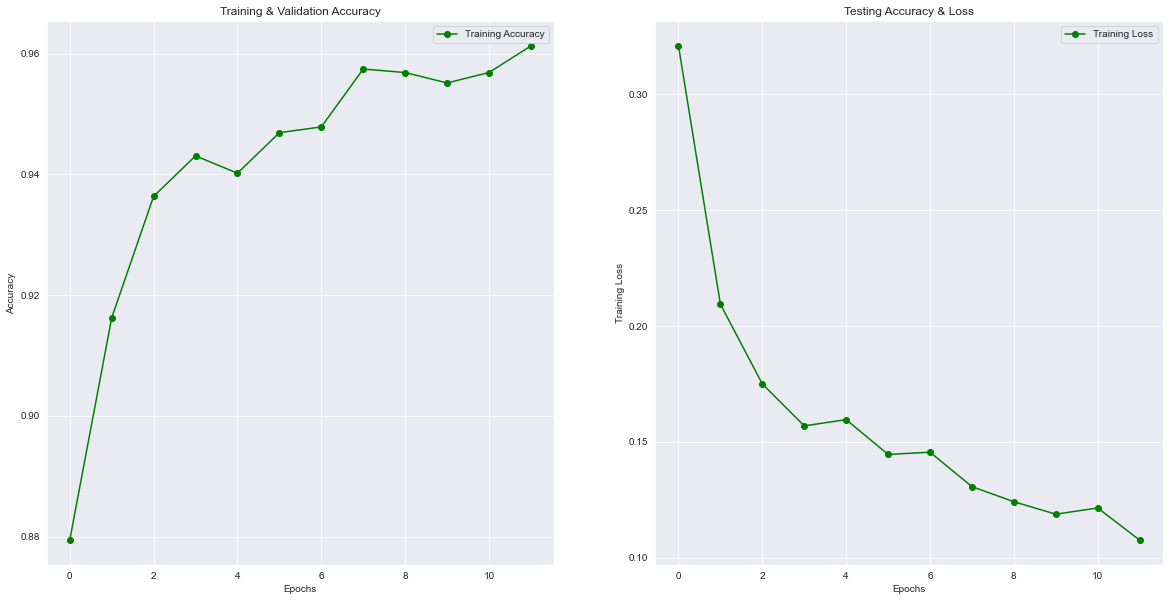

In [30]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
# ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
# ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training Loss")
plt.show()

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


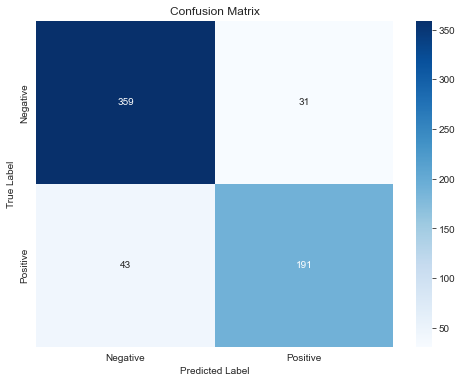

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix

# Assume model is already trained and x_test, y_test are defined
# If the model is not loaded in this session:
# model = load_model('path_to_your_model.h5')

# Ensure your test data is correctly preprocessed to match training data preprocessing
# x_test_preprocessed = preprocess_input(x_test)  # Uncomment and define this function if necessary

# Predict probabilities for the test set
y_pred_probs = model.predict(x_test)

# Convert probabilities to binary predictions
y_pred = (y_pred_probs > 0.5).astype(int)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


In [69]:

predictions = model.predict(x_test)
predictions = (predictions > 0.5).astype(int).flatten()

# Display the first 15 predictions
predictions[:15]


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

# CBAM

In [32]:
from tensorflow.keras.layers import Layer, Dense, Conv2D, GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, Multiply, Add, Permute, Concatenate, Activation, Lambda
import tensorflow.keras.backend as K

class ChannelAttention(Layer):
    def __init__(self, ratio=8):
        super(ChannelAttention, self).__init__()
        self.ratio = ratio

    def build(self, input_shape):
        self.shared_layer_one = Dense(input_shape[3] // self.ratio, activation='relu', kernel_initializer='he_normal', use_bias=True, bias_initializer='zeros')
        self.shared_layer_two = Dense(input_shape[3], kernel_initializer='he_normal', use_bias=True, bias_initializer='zeros')

    def call(self, input_tensor):
        avg_pool = GlobalAveragePooling2D()(input_tensor)
        avg_pool = Reshape((1, 1, avg_pool.shape[-1]))(avg_pool)
        avg_pool = self.shared_layer_one(avg_pool)
        avg_pool = self.shared_layer_two(avg_pool)

        max_pool = GlobalMaxPooling2D()(input_tensor)
        max_pool = Reshape((1, 1, max_pool.shape[-1]))(max_pool)
        max_pool = self.shared_layer_one(max_pool)
        max_pool = self.shared_layer_two(max_pool)

        cbam_feature = Add()([avg_pool, max_pool])
        cbam_feature = Activation('sigmoid')(cbam_feature)

        return Multiply()([input_tensor, cbam_feature])


class SpatialAttention(Layer):
    def __init__(self, kernel_size=7):
        super(SpatialAttention, self).__init__()
        self.kernel_size = kernel_size
        self.conv2d = Conv2D(1, (kernel_size, kernel_size), strides=(1, 1), padding='same', activation='sigmoid', kernel_initializer='he_normal', use_bias=False)

    def call(self, input_tensor):
        avg_pool = Lambda(lambda x: K.mean(x, axis=3, keepdims=True))(input_tensor)
        max_pool = Lambda(lambda x: K.max(x, axis=3, keepdims=True))(input_tensor)
        concat = Concatenate(axis=3)([avg_pool, max_pool])
        cbam_feature = self.conv2d(concat)
        return Multiply()([input_tensor, cbam_feature])

class CBAMBlock(Layer):
    def __init__(self, ratio=8, kernel_size=7):
        super(CBAMBlock, self).__init__()
        self.channel_attention = ChannelAttention(ratio)
        self.spatial_attention = SpatialAttention(kernel_size)

    def call(self, input_tensor):
        x = self.channel_attention(input_tensor)
        x = self.spatial_attention(x)
        return x


In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense

# If you're using a custom CBAM block, make sure it's defined or imported correctly
# from cbam_module import CBAMBlock  # Assuming you have a separate module for CBAM

model1 = Sequential()
model1.add(Conv2D(32, (3,3), strides=1, padding='same', activation='relu', input_shape=(128,128,1)))
model1.add(BatchNormalization())
model1.add(CBAMBlock())  # Add CBAM after initial normalization
model1.add(MaxPooling2D((2,2), strides=2, padding='same'))

model1.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu'))
model1.add(Dropout(0.1))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2,2), strides=2, padding='same'))

model1.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu'))
model1.add(BatchNormalization()) 
model1.add(MaxPooling2D((2,2), strides=2, padding='same'))

model1.add(Conv2D(128, (3,3), strides=1, padding='same', activation='relu'))
model1.add(Dropout(0.2))
model1.add(BatchNormalization())
model1.add(CBAMBlock())  # CBAM here before the final set of convolutions
model1.add(MaxPooling2D((2,2), strides=2, padding='same'))

model1.add(Conv2D(256, (3,3), strides=1, padding='same', activation='relu'))
model1.add(Dropout(0.2))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2,2), strides=2, padding='same'))

model1.add(Flatten())
model1.add(Dense(units=128, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model1.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])

# Show model summary
model1.summary()

c:\Users\91638\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cbam_block (CBAMBlock)          │ (None, 128, 128, 32)   │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cbam_block_1 (CBAMBlock)        │ (None, 16, 16, 128)    │         4,338 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 956,217 (3.65 MB)

 Trainable params: 955,129 (3.64 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [34]:
from tensorflow.keras.utils import plot_model
plot_model(model1, to_file='CNN_CBAM.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) for `plot_model` to work.


In [73]:
#learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

Epoch 1/20


c:\Users\91638\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


243/243 ━━━━━━━━━━━━━━━━━━━━ 131s 516ms/step - accuracy: 0.7915 - loss: 0.8292
Epoch 2/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 125s 513ms/step - accuracy: 0.9005 - loss: 0.3364
Epoch 3/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 125s 514ms/step - accuracy: 0.9313 - loss: 0.2543
Epoch 4/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 124s 511ms/step - accuracy: 0.9325 - loss: 0.2527
Epoch 5/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 124s 510ms/step - accuracy: 0.9322 - loss: 0.2281
Epoch 6/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 125s 513ms/step - accuracy: 0.9389 - loss: 0.2119
Epoch 7/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 125s 511ms/step - accuracy: 0.9421 - loss: 0.2098
Epoch 8/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 125s 511ms/step - accuracy: 0.9520 - loss: 0.1807
Epoch 9/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 124s 511ms/step - accuracy: 0.9460 - loss: 0.1991
Epoch 10/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 125s 512ms/step - accuracy: 0.9487 - loss: 0.1756
Epoch 11/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 126s 518ms/step - accuracy: 0.9517 - loss: 0.1730
Epoch 12/20
243/243

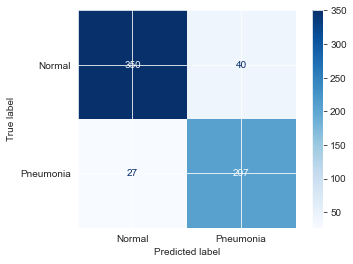

In [35]:
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have X_train, y_train, X_test, y_test
# Note: Ensure X_train and X_test are reshaped and normalized appropriately for your model

# Apply SMOTE to rebalance the dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(
    x_train.reshape(-1, x_train.shape[1] * x_train.shape[2] * x_train.shape[3]), y_train)
X_resampled = X_resampled.reshape(-1, x_train.shape[1], x_train.shape[2], x_train.shape[3])

# Compute class weights
# Adjust the weight for Pneumonia (class 1)
class_weight_dict = {0: 1.0, 1: 2.0}

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_resampled)

# Compile your model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='accuracy',  # monitor the accuracy
    patience=3,  # number of epochs with no improvement after which training will be stopped
    verbose=1,
    mode='max',  # mode should be 'max' for accuracy
    restore_best_weights=True  # restore the best weights observed during training
)

# Train your model with class weights, data augmentation, and early stopping
model1.fit(datagen.flow(X_resampled, y_resampled, batch_size=32),
          class_weight=class_weight_dict,
          epochs=20,
          callbacks=[early_stopping])

# Make predictions
y_pred_prob = model.predict(x_test)
# For binary classification, y_pred_prob will have shape (num_samples, 1)
# You can flatten it to (num_samples,) for further processing
y_pred_prob = y_pred_prob.flatten()

# Find the optimal decision threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
optimal_idx = np.argmax(precision * recall)
optimal_threshold = thresholds[optimal_idx]

# Apply the optimal threshold to get the final class predictions
y_pred_classes = (y_pred_prob >= optimal_threshold).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Pneumonia'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [75]:
model1.save(r"E:\AMRITA BTECH ALL SEM FILES\6th sem\DL\END SEM PROJECT\dataset and codes and docs\DL_end_sem_dataset\chest_xray\DL_CNN_CBAM_newdata.h5")  # Saves to HDF5 file


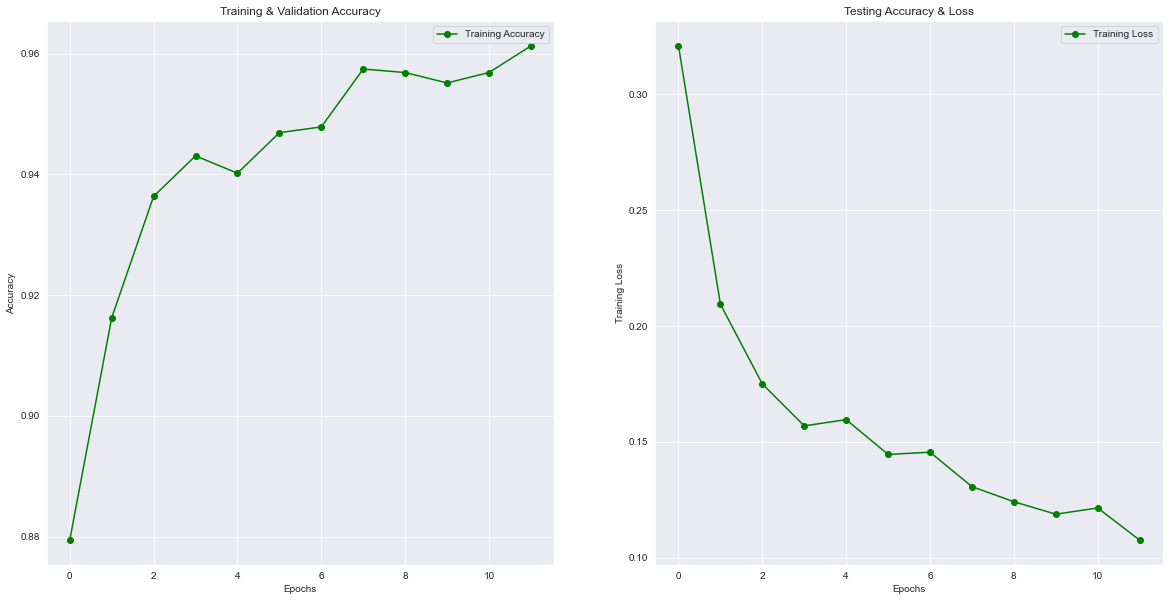

In [37]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
# ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
# ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training Loss")
plt.show()

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step


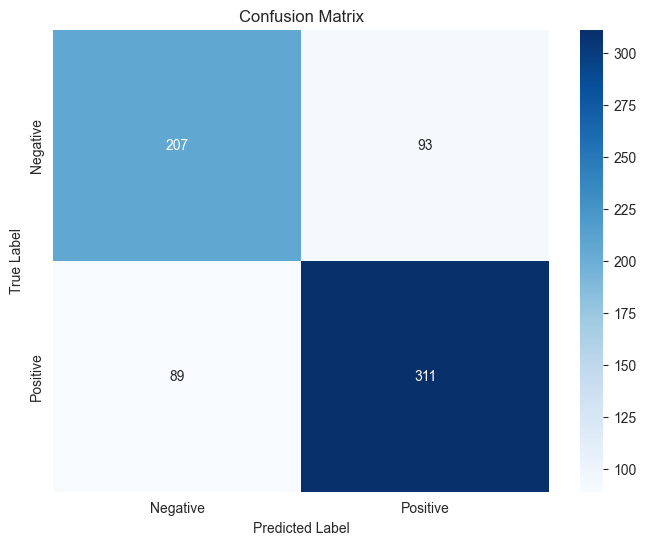

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix

# Assume model is already trained and x_test, y_test are defined
# If the model is not loaded in this session:
# model = load_model('path_to_your_model.h5')

# Ensure your test data is correctly preprocessed to match training data preprocessing
# x_test_preprocessed = preprocess_input(x_test)  # Uncomment and define this function if necessary

# Predict probabilities for the test set
y_pred_probs = model1.predict(x_test)

# Convert probabilities to binary predictions
y_pred = (y_pred_probs > 0.5).astype(int)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


In [78]:

predictions = model.predict(x_test)
predictions = (predictions > 0.5).astype(int).flatten()

# Display the first 15 predictions
predictions[:15]


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

now we are using the SVM as the classfier


In [42]:
from keras.models import Model

# Assuming `model1` is your base model and 'dense_6' is the name of the layer you want to use as output
feature_extractor = Model(inputs=model1.inputs, outputs=model1.get_layer('dropout_11').output)

# To display the summary of your new feature extractor model
feature_extractor.summary()

Model: "functional_69"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cbam_block (CBAMBlock)          │ (None, 128, 128, 32)   │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cbam_block_1 (CBAMBlock)        │ (None, 16, 16, 128)    │         4,338 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 956,088 (3.65 MB)

 Trainable params: 955,000 (3.64 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define directories (ensure these paths correctly point to your data)
train_dir = r"train"
test_dir = r"test"  # Ensure this points to the validation directory, not train

# Set up data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'
)


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [53]:
import numpy as np

# Initialize lists to store features and labels
train_features = []
train_labels = []

# You can define 'expected_number_of_samples' explicitly if not defined
expected_number_of_samples = len(train_generator.filenames)

# Iterate over the generator to collect features and labels
for images, labels in train_generator:
    features = feature_extractor.predict(images)
    train_features.append(features)
    train_labels.extend(labels)

    # Break the loop once we have processed the expected number of samples
    if len(train_labels) >= expected_number_of_samples:
        break

# Convert lists to numpy arrays
train_features = np.vstack(train_features)  # Stack feature arrays
train_features_flat = train_features.reshape((train_features.shape[0], -1))
train_labels = np.array(train_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [62]:
import numpy as np

# Initialize lists to store validation features and labels
test_features = []
test_labels = []

# Define the expected number of samples for the validation set
expected_test_samples = len(test_generator.filenames)

# Iterate over the validation generator to collect features and labels
for images, labels in test_generator:
    features = feature_extractor.predict(images)
    test_features.append(features)
    test_labels.extend(labels)

    # Break the loop once we have processed the expected number of validation samples
    if len(test_labels) >= expected_test_samples:
        break

# Convert lists to numpy arrays for validation set
test_features = np.vstack(test_features)  # Stack feature arrays
test_features_flat = test_features.reshape((test_features.shape[0], -1))
test_labels = np.array(test_labels)

# Now val_features_flat and val_labels should align perfectly


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


In [61]:
print("Features shape:", train_features_flat.shape)
print("Labels shape:", train_labels.shape)


Features shape: (5216, 128)
Labels shape: (5216,)


In [56]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Creating a pipeline with class weight balanced
svm_classifier = make_pipeline(
    StandardScaler(), 
    SVC(kernel='linear', probability=True, class_weight='balanced')
)
svm_classifier.fit(train_features_flat, train_labels)




Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(class_weight='balanced', kernel='linear',
                     probability=True))])

In [57]:
# Convert labels from float to int
train_labels = train_labels.astype(int)
test_labels = test_labels.astype(int)

# Now you can use np.bincount to count the class instances
class_counts = np.bincount(train_labels)
class_counts_test = np.bincount(test_labels)

# Print class distribution
print(f"Class distribution in training set: {class_counts}")
print(f"Class distribution in validation set: {class_counts_test}")


Class distribution in training set: [1341 3875]
Class distribution in validation set: [234 390]


In [64]:

from sklearn.metrics import accuracy_score, classification_report
# Perform prediction
test_predictions = svm_classifier.predict(test_features_flat)

# Continue with your existing checks and evaluations

print("Validation Accuracy:", accuracy_score(test_labels, test_predictions))
print("Validation Classification Report:\n", classification_report(test_labels, test_predictions))


Validation Accuracy: 0.8653846153846154
Validation Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.65      0.78       234
         1.0       0.83      0.99      0.90       390

    accuracy                           0.87       624
   macro avg       0.90      0.82      0.84       624
weighted avg       0.88      0.87      0.86       624



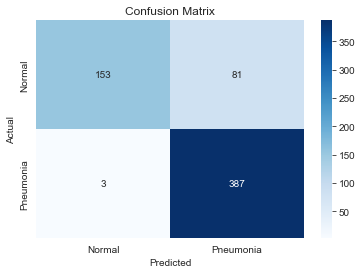

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assume val_predictions and val_labels are already defined as your validation predictions and labels
cm = confusion_matrix(test_labels, test_predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
